In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
all_data = pd.read_csv('/Users/dariatsymbal/Desktop/projects/Netflix/imdb_top_1000.csv', error_bad_lines = False)

/var/folders/h_/sy5w4sps19ldfh_7htkxsmv00000gn/T/ipykernel_15915/1662845624.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  all_data = pd.read_csv('/Users/dariatsymbal/Desktop/projects/Netflix/imdb_top_1000.csv', error_bad_lines = False)


In [3]:
all_data = all_data.dropna(how='any')

In [4]:
all_data.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


## IMDb rating over time

In [5]:
all_data['Released_Year'].unique()

array(['1994', '1972', '2008', '1974', '1957', '2003', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2019',
       '2014', '1998', '1997', '1995', '1991', '1977', '1954', '2011',
       '2006', '2000', '1988', '1985', '1968', '1960', '1942', '1936',
       '1931', '2018', '2016', '2017', '2012', '2009', '1981', '1979',
       '1964', '2004', '1992', '1987', '1986', '1984', '1983', '1976',
       '1973', '1971', '1965', '1962', '1959', '1958', '1952', '1944',
       '1941', '2013', '2007', '2005', '1989', '1963', '1950', '1948',
       '2015', '1996', '1982', '1978', '1967', '1951', '1949', '1940',
       '1939', '1934', '1970', '1969', '1961', '1946', '1930', '1938',
       '1933', 'PG', '1953'], dtype=object)

In [6]:
all_data = all_data[all_data['Released_Year'] != 'PG']

In [7]:
all_data['Released_Year'] = all_data['Released_Year'].astype(int)

In [8]:
all_data['decade'] = (all_data['Released_Year'] - 1900)// 10 * 10 + 1900


In [9]:
movies_over_time = all_data.groupby('decade')['IMDB_Rating'].mean()

In [10]:
movies_over_time

decade
1930    8.122222
1940    8.110000
1950    8.142857
1960    8.002857
1970    7.967273
1980    7.938158
1990    7.971875
2000    7.893000
2010    7.897765
Name: IMDB_Rating, dtype: float64

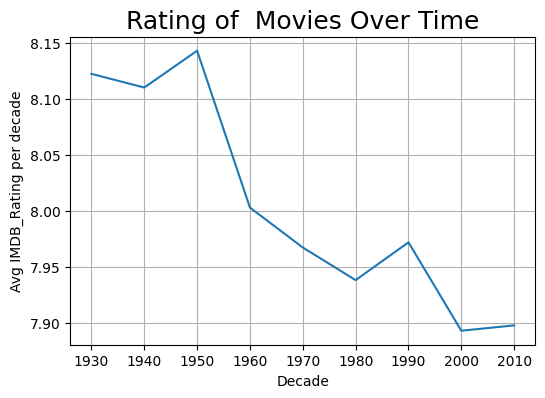

In [11]:

figure = plt.figure(figsize=(6, 4))

plt.plot(movies_over_time.index, movies_over_time.values)
plt.xlabel('Decade')
plt.ylabel('Avg IMDB_Rating per decade')
plt.title('Rating of  Movies Over Time', fontsize = 18)


plt.grid(True)


plt.show()

## Top 10 directors

In [12]:
directors = all_data[['Director', 'IMDB_Rating', 'Series_Title']] \
                .groupby('Director') \
                .agg({'Series_Title': 'count', 'IMDB_Rating': 'mean'})

In [13]:
directors = directors.rename(columns={'Series_Title': 'Movie_Count'})


In [14]:
directors = directors[directors['Movie_Count'] >= 3]


In [15]:
directors = directors.sort_values(by = 'IMDB_Rating', ascending = False)

In [16]:
directors.head(10)

,Movie_Count,IMDB_Rating
Director,,
Christopher Nolan,8,8.462500
Peter Jackson,5,8.400000
Francis Ford Coppola,5,8.400000
Stanley Kubrick,6,8.266667
Sergio Leone,5,8.240000
Billy Wilder,4,8.225000
Quentin Tarantino,8,8.175000
Martin Scorsese,10,8.170000
Bong Joon Ho,3,8.166667


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Christopher Nolan'),
  Text(1, 0, 'Peter Jackson'),
  Text(2, 0, 'Francis Ford Coppola'),
  Text(3, 0, 'Stanley Kubrick'),
  Text(4, 0, 'Sergio Leone'),
  Text(5, 0, 'Billy Wilder'),
  Text(6, 0, 'Quentin Tarantino'),
  Text(7, 0, 'Martin Scorsese'),
  Text(8, 0, 'Bong Joon Ho'),
  Text(9, 0, 'Alfred Hitchcock')])

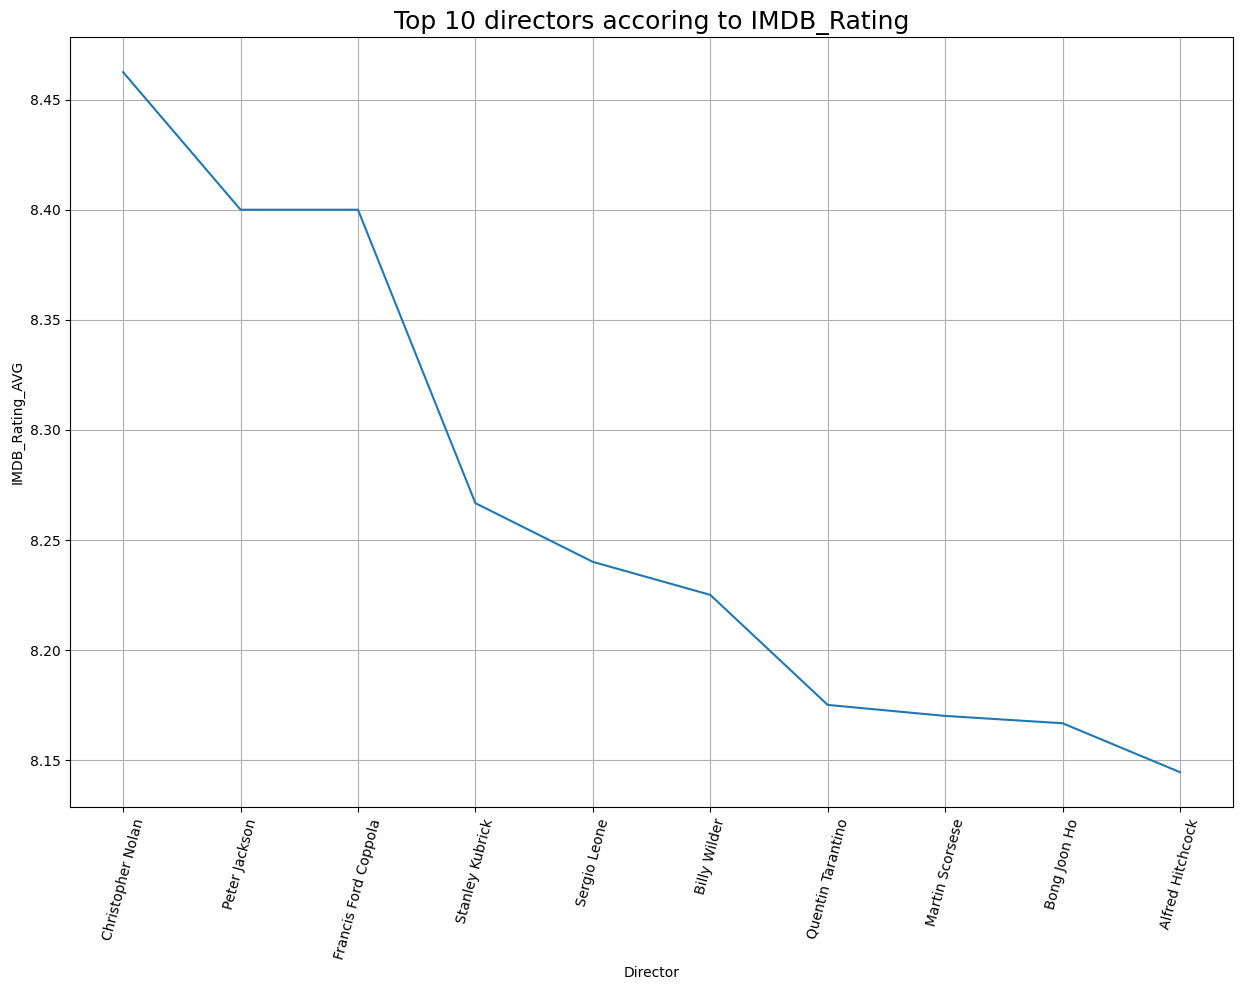

In [17]:
plt.figure(figsize=(15,10))
plt.plot(directors.index[:10], directors['IMDB_Rating'][:10])

plt.xlabel('Director')
plt.ylabel('IMDB_Rating_AVG')
plt.title('Top 10 directors accoring to IMDB_Rating', fontsize = 18)
plt.grid(True)

plt.xticks(rotation=75)


## Top genres according to the rating

In [18]:
# x - string of the genres for each movie
# i - after creating list 'i' is an element of the list

def fun(x):
    splitted = x.split(',')
    return [i.strip() for i in splitted]

 

all_data['Genre'] = all_data['Genre'].apply(fun)


In [19]:
# just to check the result

all_data.explode('Genre')


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,decade
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469",1990
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,Crime,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411",1970
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,Drama,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411",1970
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,Action,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444",2000
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,Crime,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444",2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,https://m.media-amazon.com/images/M/MV5BZjQyMG...,A Hard Day's Night,1964,U,87 min,Music,7.6,"Over two ""typical"" days in the life of The Bea...",96.0,Richard Lester,John Lennon,Paul McCartney,George Harrison,Ringo Starr,40351,"13,780,024",1960
994,https://m.media-amazon.com/images/M/MV5BZjQyMG...,A Hard Day's Night,1964,U,87 min,Musical,7.6,"Over two ""typical"" days in the life of The Bea...",96.0,Richard Lester,John Lennon,Paul McCartney,George Harrison,Ringo Starr,40351,"13,780,024",1960
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,Drama,7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000",1950
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,Romance,7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000",1950


In [20]:
# to apply result

genres = all_data[['Genre', 'IMDB_Rating']].explode('Genre').groupby('Genre').mean()

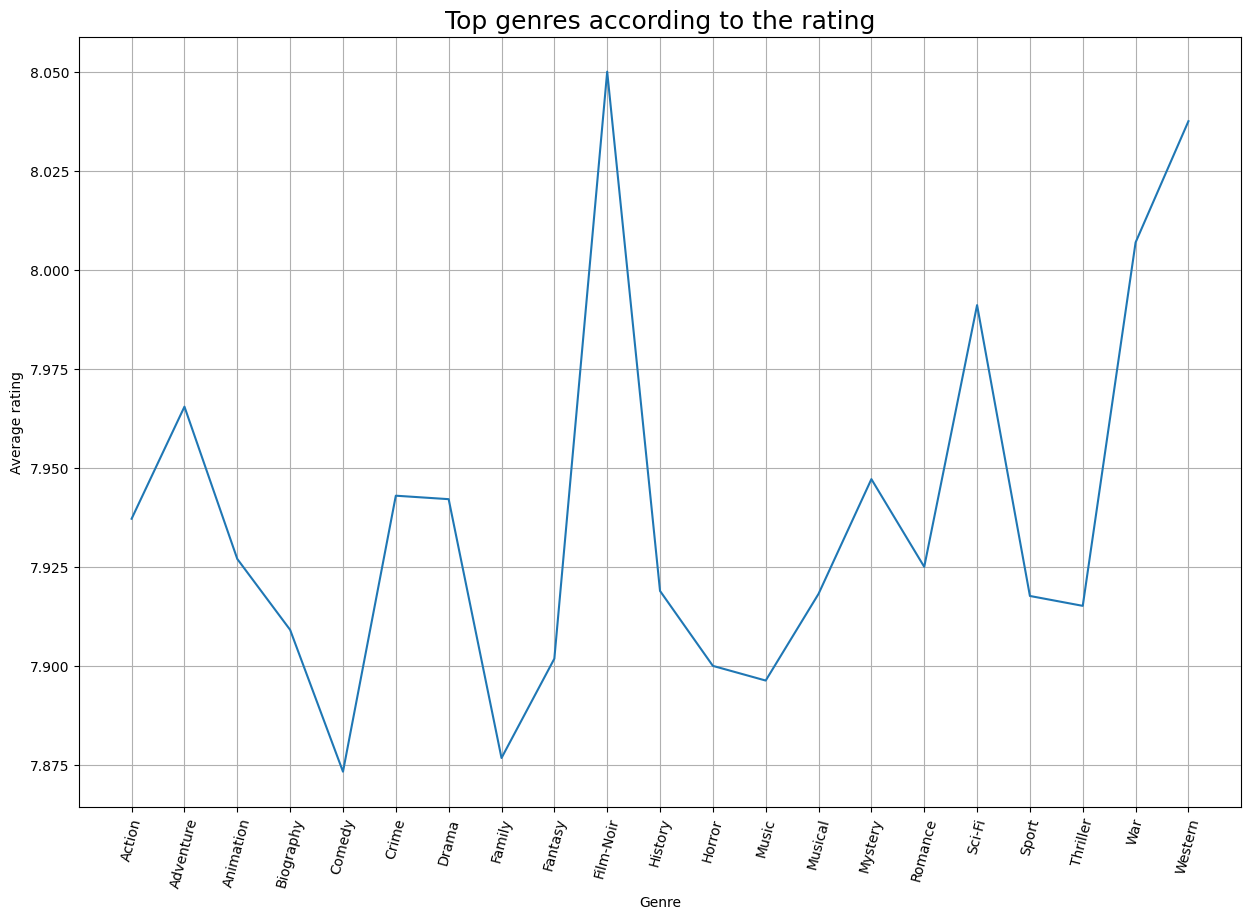

In [21]:
plt.figure(figsize=(15,10))

plt.plot(genres.index, genres.values)


plt.xlabel('Genre')
plt.ylabel('Average rating')
plt.title('Top genres according to the rating', fontsize = 18)
plt.grid(True)

plt.xticks(rotation=75)
plt.savefig('/users/dariatsymbal/Downloads/genres.png')
plt.show()



## Film rating and earning

In [22]:
all_data['Gross'].unique()

array(['28,341,469', '134,966,411', '534,858,444', '57,300,000',
       '4,360,000', '377,845,905', '107,928,762', '96,898,818',
       '292,576,195', '37,030,102', '315,544,750', '330,252,182',
       '6,100,000', '342,551,365', '171,479,930', '46,836,394',
       '290,475,067', '112,000,000', '53,367,844', '188,020,017',
       '7,563,397', '10,055,859', '216,540,909', '136,801,374',
       '57,598,247', '100,125,643', '130,742,922', '322,740,140',
       '269,061', '335,451,311', '13,092,000', '13,182,281', '53,089,891',
       '132,384,315', '32,572,577', '187,705,427', '6,719,864',
       '23,341,568', '19,501,238', '422,783,777', '204,843,350',
       '11,990,401', '210,609,762', '5,321,508', '32,000,000',
       '1,024,560', '163,245', '19,181', '1,661,096', '5,017,246',
       '190,241,310', '858,373,000', '678,815,482', '209,726,015',
       '162,805,434', '448,139,099', '6,532,908', '223,808,164',
       '11,286,112', '707,481', '25,544,867', '2,375,308', '248,159,971',
     

In [23]:
all_data['earning_gross'] = all_data['Gross'].apply(lambda x: int(x.replace(',', '')) / 1000000)

In [24]:
earning = all_data[['earning_gross', 'IMDB_Rating']]

In [25]:
earning

,earning_gross,IMDB_Rating
0,28.341469,9.3
1,134.966411,9.2
2,534.858444,9.0
3,57.300000,9.0
4,4.360000,9.0
...,...,...
990,0.696690,7.6
991,1.378435,7.6
992,141.843612,7.6
994,13.780024,7.6


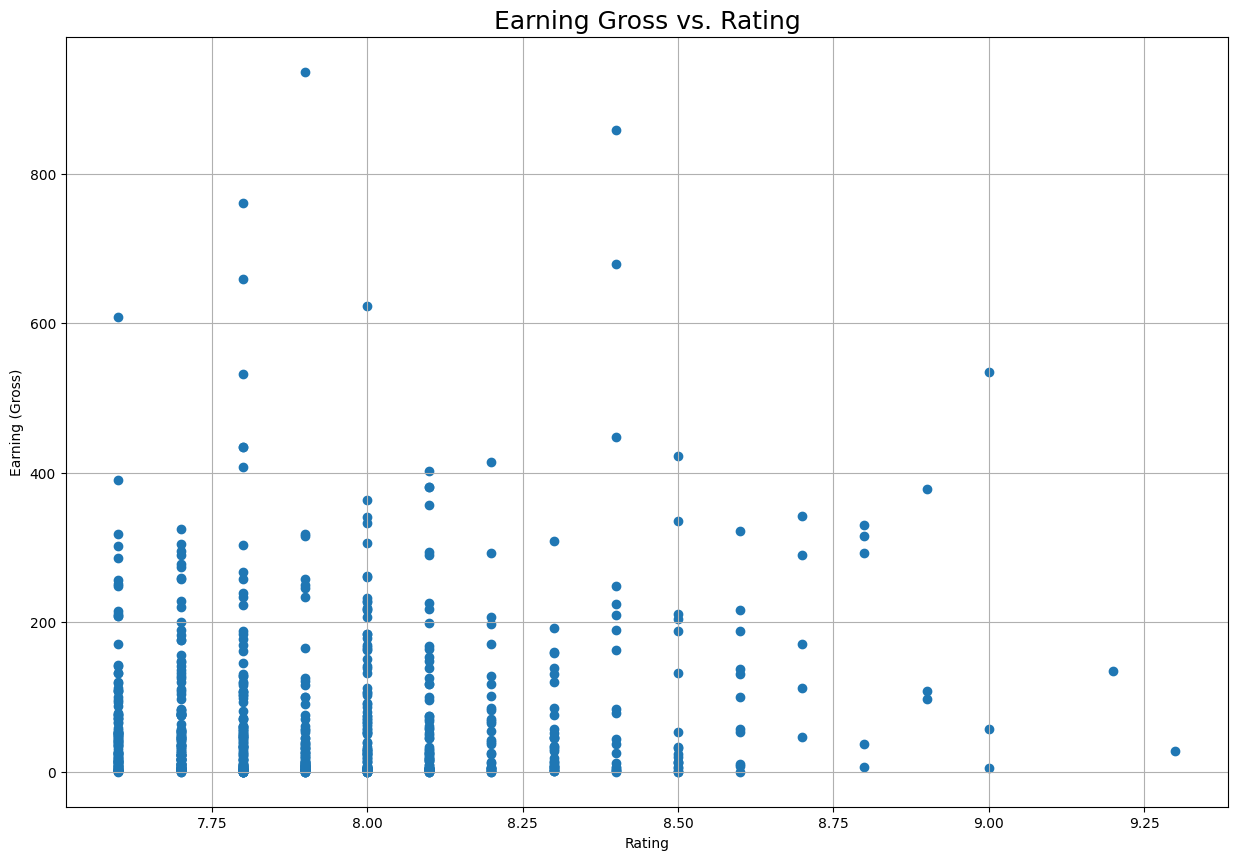

In [26]:
plt.figure(figsize=(15, 10))

plt.scatter(earning['IMDB_Rating'], earning['earning_gross'])

plt.xlabel('Rating')
plt.ylabel('Earning (Gross)')
plt.title('Earning Gross vs. Rating', fontsize = 18)
plt.grid(True)


plt.show()

## High rated stars

In [27]:


all_data['all_stars'] = all_data.apply(lambda row: [row['Star1'], row['Star2'], row['Star3'], row['Star4']], axis=1)



In [28]:

all_data['all_stars'][0]



['Tim Robbins', 'Morgan Freeman', 'Bob Gunton', 'William Sadler']

In [29]:
all_data.explode('all_stars')


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,decade,earning_gross,all_stars
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,[Drama],9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469",1990,28.341469,Tim Robbins
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,[Drama],9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469",1990,28.341469,Morgan Freeman
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,[Drama],9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469",1990,28.341469,Bob Gunton
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,[Drama],9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469",1990,28.341469,William Sadler
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"[Crime, Drama]",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411",1970,134.966411,Marlon Brando
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,https://m.media-amazon.com/images/M/MV5BZjQyMG...,A Hard Day's Night,1964,U,87 min,"[Comedy, Music, Musical]",7.6,"Over two ""typical"" days in the life of The Bea...",96.0,Richard Lester,John Lennon,Paul McCartney,George Harrison,Ringo Starr,40351,"13,780,024",1960,13.780024,Ringo Starr
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"[Drama, Romance, War]",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000",1950,30.500000,Burt Lancaster
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"[Drama, Romance, War]",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000",1950,30.500000,Montgomery Clift
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"[Drama, Romance, War]",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000",1950,30.500000,Deborah Kerr


In [30]:
high_rated_stars = all_data[['all_stars', 'IMDB_Rating', 'Series_Title']] \
                    .explode('all_stars') \
                    .groupby('all_stars') \
                    .agg({'IMDB_Rating': 'mean', 'Series_Title': 'count'}) 





In [31]:
high_rated_stars = high_rated_stars[high_rated_stars['Series_Title'] >= 3]


In [32]:
high_rated_stars = high_rated_stars.sort_values(by = 'IMDB_Rating', ascending = False)

In [33]:
high_rated_stars

,IMDB_Rating,Series_Title
all_stars,,
Elijah Wood,8.800000,3
Orlando Bloom,8.600000,4
Mark Hamill,8.533333,3
Marlon Brando,8.425000,4
Lee J. Cobb,8.366667,3
...,...,...
Jude Law,7.666667,3
Sandra Bullock,7.666667,3
Samantha Morton,7.650000,4


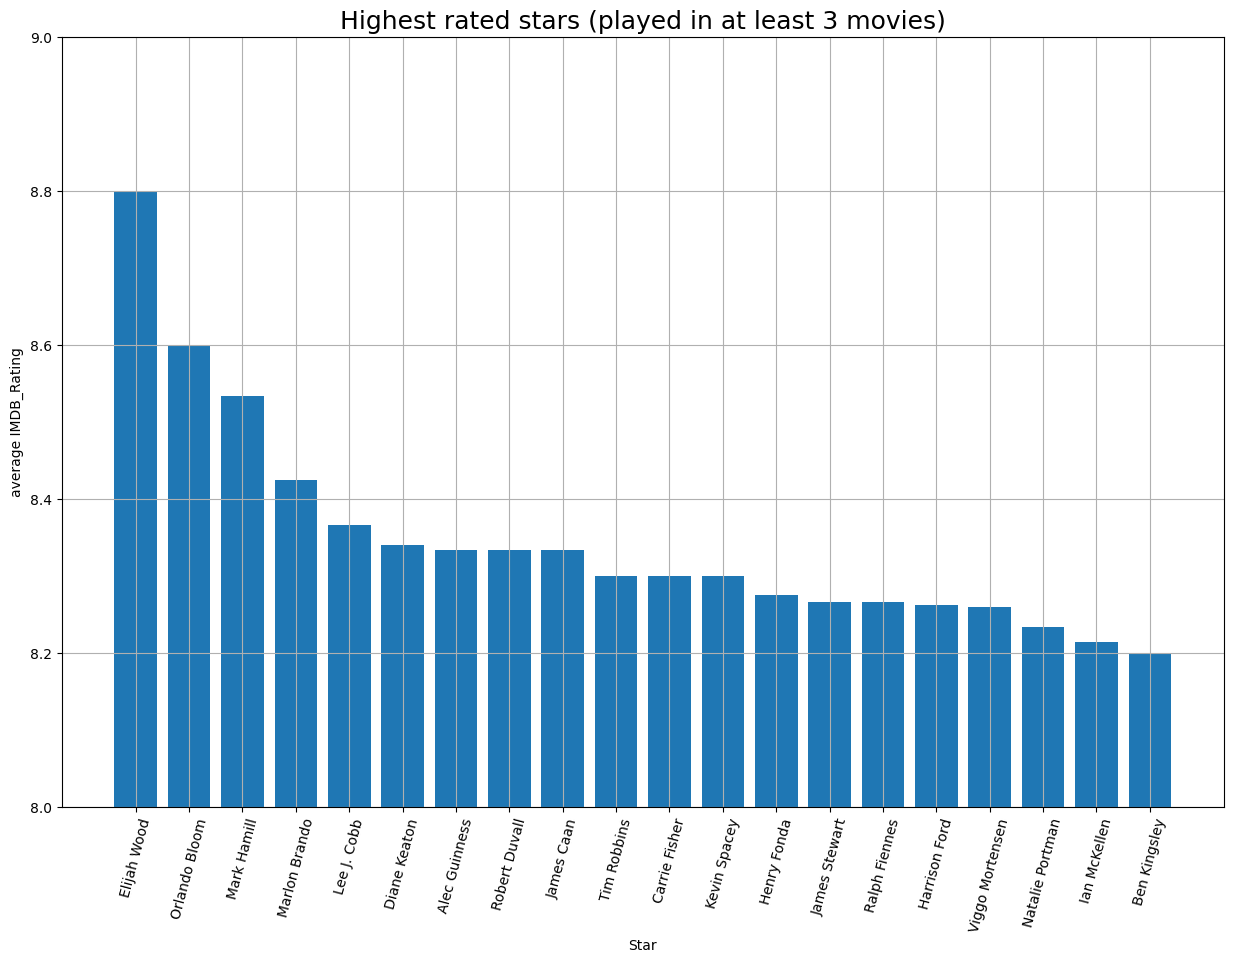

In [34]:
plt.figure(figsize=(15,10))

plt.bar(high_rated_stars.index[:20], high_rated_stars['IMDB_Rating'][:20])


plt.xlabel('Star')
plt.ylabel('average IMDB_Rating')
plt.title('Highest rated stars (played in at least 3 movies)', fontsize = 18)
plt.ylim(8, 9.0)
plt.grid(True)

plt.show
plt.xticks(rotation=75)
plt.savefig('/users/dariatsymbal/Downloads/stars.png')


## The most popular stars

In [35]:
high_rated_stars.sort_values(by = 'Series_Title', ascending = False)

,IMDB_Rating,Series_Title
all_stars,,
Robert De Niro,8.100000,16
Tom Hanks,8.069231,13
Al Pacino,8.076923,13
Brad Pitt,8.016667,12
Christian Bale,8.045455,11
...,...,...
Jean-Louis Trintignant,8.000000,3
Colin Firth,8.000000,3
Karl Malden,8.000000,3


In [36]:
## High rated stars VS The most popular stars

In [37]:
pop_high_rated_stars = high_rated_stars.sort_values(by = 'Series_Title', ascending = False)

In [38]:
pop_high_rated_stars

,IMDB_Rating,Series_Title
all_stars,,
Robert De Niro,8.100000,16
Tom Hanks,8.069231,13
Al Pacino,8.076923,13
Brad Pitt,8.016667,12
Christian Bale,8.045455,11
...,...,...
Jean-Louis Trintignant,8.000000,3
Colin Firth,8.000000,3
Karl Malden,8.000000,3


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Robert De Niro'),
  Text(1, 0, 'Tom Hanks'),
  Text(2, 0, 'Al Pacino'),
  Text(3, 0, 'Brad Pitt'),
  Text(4, 0, 'Christian Bale'),
  Text(5, 0, 'Clint Eastwood'),
  Text(6, 0, 'Leonardo DiCaprio'),
  Text(7, 0, 'Matt Damon'),
  Text(8, 0, 'Denzel Washington'),
  Text(9, 0, 'Johnny Depp'),
  Text(10, 0, 'Ethan Hawke'),
  Text(11, 0, 'Scarlett Johansson'),
  Text(12, 0, 'Harrison Ford'),
  Text(13, 0, 'Ian McKellen'),
  Text(14, 0, 'Tom Cruise'),
  Text(15, 0, 'Morgan Freeman'),
  Text(16, 0, 'Bruce Willis'),
  Text(17, 0, 'Russell Crowe'),
  Text(18, 0, 'Michael Caine'),
  Text(19, 0, 'Robert Downey Jr.')])

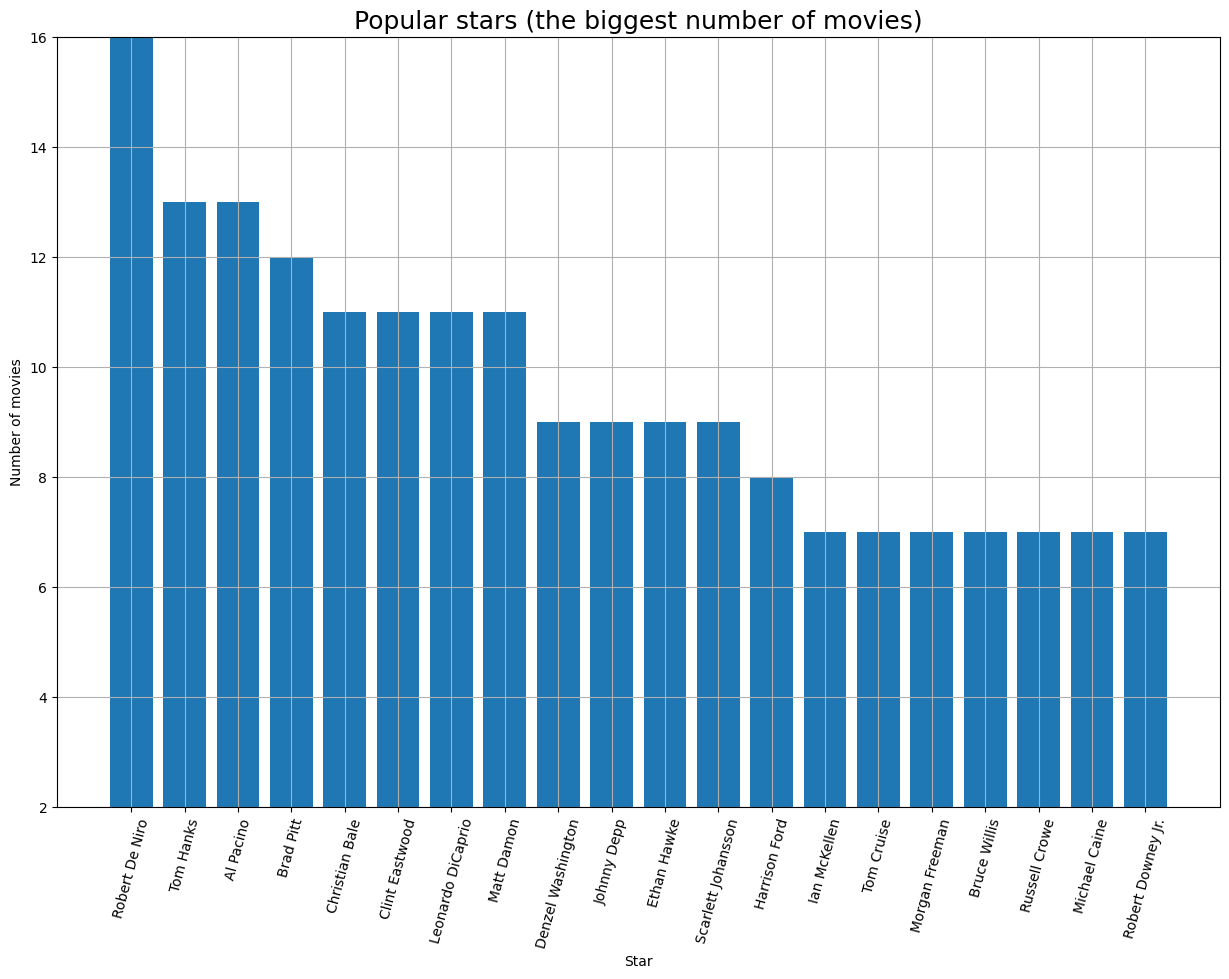

In [39]:
plt.figure(figsize=(15,10))

plt.bar(pop_high_rated_stars.index[:20], pop_high_rated_stars['Series_Title'][:20])


plt.xlabel('Star')
plt.ylabel('Number of movies')
plt.title('Popular stars (the biggest number of movies)', fontsize = 18)
plt.ylim(2, 16)
plt.grid(True)

plt.show
plt.xticks(rotation=75)

## Number of movies vs average rating per star

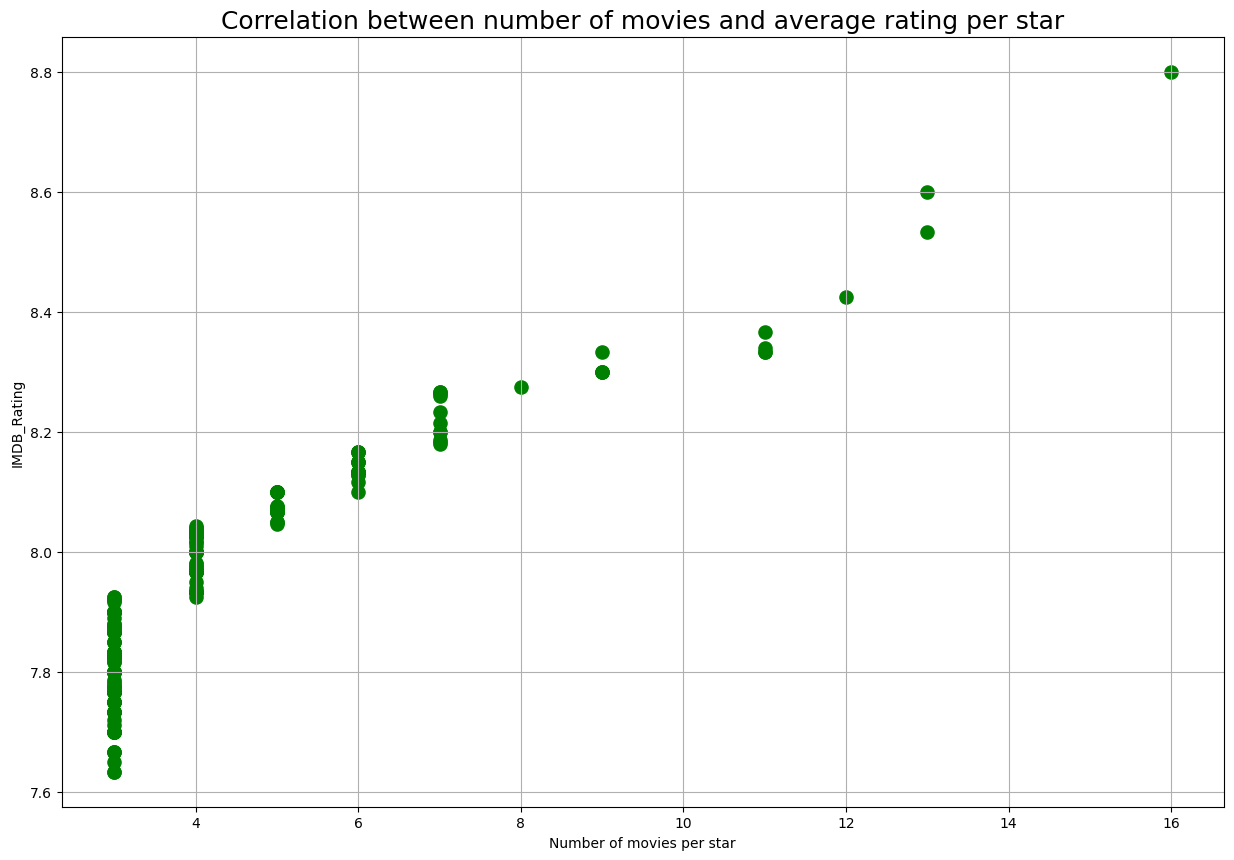

In [40]:
plt.figure(figsize=(15, 10))

plt.scatter(pop_high_rated_stars['Series_Title'], high_rated_stars['IMDB_Rating'], color='green', marker='o', s=90)

plt.xlabel('Number of movies per star')
plt.ylabel('IMDB_Rating')
plt.title('Correlation between number of movies and average rating per star', fontsize = 18)
plt.grid(True)

plt.show()

## Evolving of genres over time

In [41]:
genres_over_time = all_data[['Genre', 'Released_Year', 'Series_Title']] \
                    .explode('Genre') \
                    .groupby(['Released_Year', 'Genre']) \
                    .count()

        
                                                                                                   

In [42]:
genres_over_time.head(50)

Series_Title
Released_Year Genre                  
1930          Drama                 1
              War                   1
1931          Comedy                1
              Drama                 1
              Romance               1
1933          Adventure             1
              Horror                1
              Sci-Fi                1
1934          Comedy                1
              Romance               1
1936          Comedy                1
              Drama                 1
              Family                1
1938          Action                1
              Adventure             1
              Romance               1
1939          Adventure             1
              Comedy                1
              Drama                 2
              Family                1
              Fantasy               1
              History               1
              Romance               1
1940          Animation             1
              Drama                 2
              Family                1
              Fantasy               1
              History               1
              Mystery               1
              Romance               1
1941          Drama                 1
              Mystery               1
1942          Drama                 1
              Romance               1
              War                   1
1944          Crime                 1
              Drama                 1
              Film-Noir             1
1946          Drama                 2
              Film-Noir             1
              Romance               2
              War                   1
1948          Adventure             1
              Drama                 1
              Western               1
1949          Film-Noir             1
              Mystery               1
              Thriller              1
1950          Drama                 1
1951          Adventure             1

In [43]:
pivot_table = genres_over_time.pivot_table(values='Series_Title', index='Released_Year', columns='Genre', aggfunc={'Series_Title': np.sum})


In [44]:
pivot_table

Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
Released_Year,,,,,,,,,,,,,,,,,,,,,
1930,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1931,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1933,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1934,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1936,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,4.0,6.0,2.0,3.0,4.0,3.0,15.0,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,3.0,1.0,2.0,1.0,NaN
2016,5.0,7.0,4.0,3.0,7.0,1.0,14.0,NaN,1.0,NaN,...,NaN,2.0,NaN,NaN,1.0,3.0,NaN,1.0,NaN,NaN
2017,7.0,4.0,2.0,2.0,4.0,4.0,12.0,3.0,NaN,NaN,...,1.0,NaN,NaN,3.0,1.0,1.0,NaN,1.0,NaN,NaN


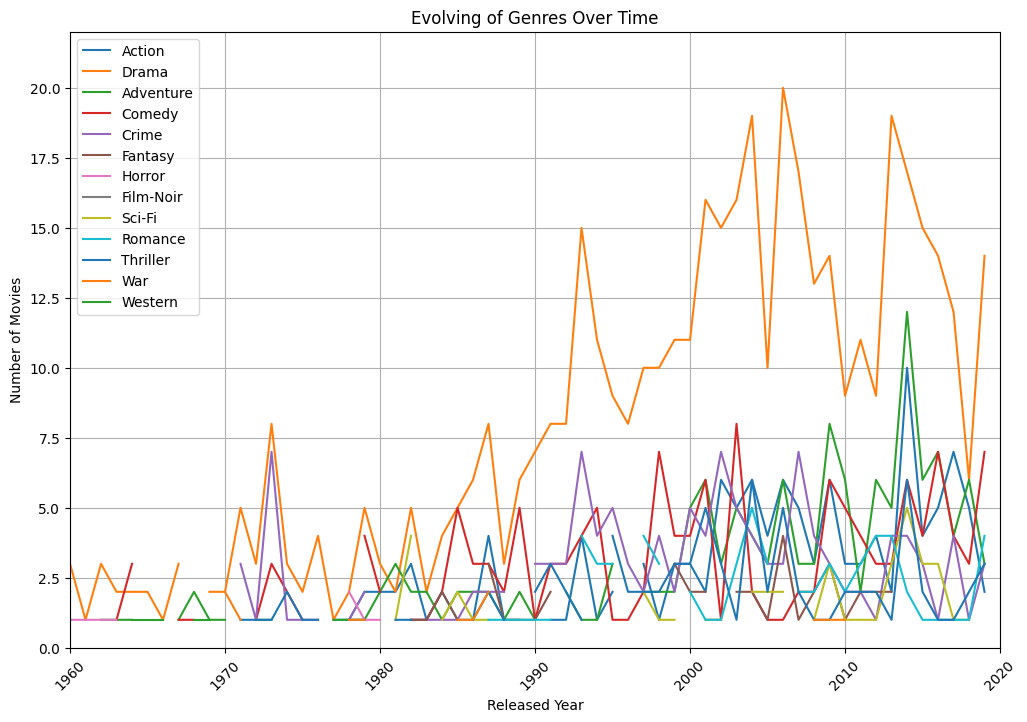

In [45]:
plt.figure(figsize=(12, 8))
plt.plot(pivot_table.index, pivot_table['Action'], label='Action')
plt.plot(pivot_table.index, pivot_table['Drama'], label='Drama')
plt.plot(pivot_table.index, pivot_table['Adventure'], label='Adventure')
plt.plot(pivot_table.index, pivot_table['Comedy'], label='Comedy')
plt.plot(pivot_table.index, pivot_table['Crime'], label='Crime')
plt.plot(pivot_table.index, pivot_table['Fantasy'], label='Fantasy')
plt.plot(pivot_table.index, pivot_table['Horror'], label='Horror')
plt.plot(pivot_table.index, pivot_table['Film-Noir'], label='Film-Noir')
plt.plot(pivot_table.index, pivot_table['Sci-Fi'], label='Sci-Fi')
plt.plot(pivot_table.index, pivot_table['Romance'], label='Romance')
plt.plot(pivot_table.index, pivot_table['Thriller'], label='Thriller')
plt.plot(pivot_table.index, pivot_table['War'], label='War')
plt.plot(pivot_table.index, pivot_table['Western'], label='Western')




plt.xlabel('Released Year')
plt.ylabel('Number of Movies')
plt.title('Evolving of Genres Over Time')
plt.ylim(0, 22)
plt.xlim(1960, 2020)


plt.xticks(rotation=45)
plt.grid(True)

plt.legend()
plt.savefig('/users/dariatsymbal/Downloads/genres_time.png')

plt.show()



## Number of votes

In [46]:
Votes_over_time = all_data[['No_of_Votes', 'Released_Year']].groupby('Released_Year').mean()

In [47]:
Votes_over_time


,No_of_Votes
Released_Year,
1930,57318.000000
1931,167839.000000
1933,78991.000000
1934,94016.000000
1936,217881.000000
...,...
2015,382304.611111
2016,307471.800000
2017,307052.000000


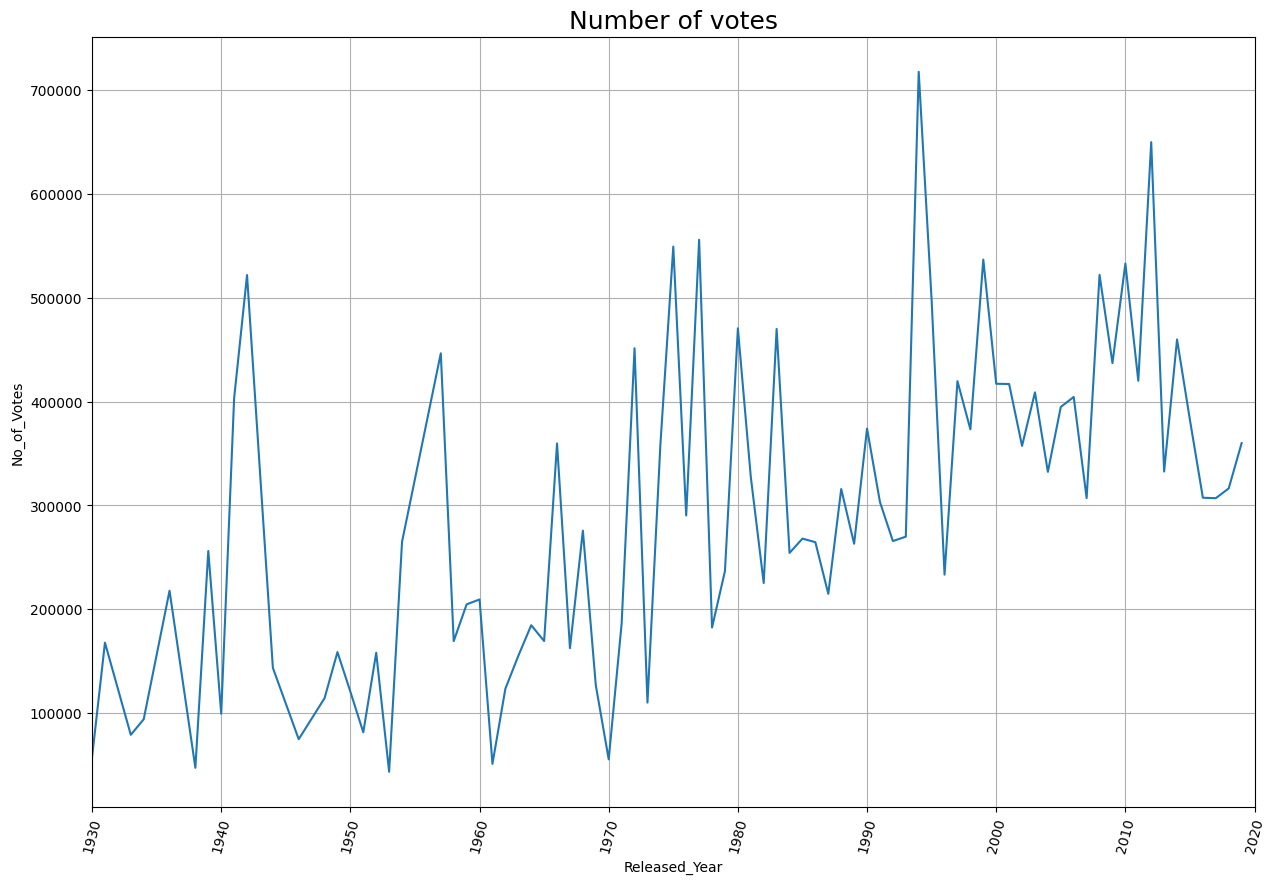

In [48]:
plt.figure(figsize=(15,10))

plt.plot(Votes_over_time.index, Votes_over_time.values)


plt.xlabel('Released_Year')
plt.ylabel('No_of_Votes')
plt.title('Number of votes', fontsize = 18)
plt.grid(True)
plt.xlim(1930, 2020)


plt.xticks(rotation=75)
plt.savefig('/users/dariatsymbal/Downloads/votes.png')
plt.show()

